In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################
#######################################################################
# Copyright (C)                                                       #
# 2017 Cheung Auyeung(cheung.auyeung@gmail.com)                       #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

# Gambler’s Problem 

A gambler has the opportunity to make bets
on the outcomes of a sequence of coin flips. 

- If the coin comes up heads, he wins as
many dollars as he has staked on that flip; 
- if it is tails, he loses his stake.  

The game ends when the gambler wins by reaching his `GOAL` of \$100, or loses by running out of
money. 

On each flip, the gambler must decide what portion of his capital to stake,
in integer numbers of dollars. This problem can be formulated as an **undiscounted**,
episodic, finite MDP. The state is the gambler’s capital, 

$$ s \in \{1, 2,\ldots, 99\}$$

and the actions are stakes, 

$$a \in \{0, 1,  \ldots \min(s, 100−s) \}.$$ 

The reward is zero on all transitions
except those on which the gambler reaches his goal, when it is +1. 

The state-value function then gives the probability of winning from each state. 

A policy is a mapping
from levels of capital to stakes. The optimal policy maximizes the probability of
reaching the goal. 

Let $p_h$ denote the probability of the coin coming up heads. If $p_h$
is known, then the entire problem is known and it can be solved, for instance, by
value iteration.

Figure 4.3 shows the change in the value function over successive
sweeps of value iteration, and the final policy found, for the case of $p_h$ = 0.4. 

In programming, it is convenient
to introduce two dummy states corresponding to termination with capital of 0 and
100, giving them values of 0 and 1 respectively, so that,
$$ s \in \{0, 1, 2,\ldots, 100\}$$

The value function with the optimal policy is found by the
Bellman optimalality equation for $v_\ast(s)$, 

$$
\begin{align}
v_\ast(s)\, &=\, \underset{a \in A(s)}{\mathrm{argmax}}\, \sum_{s',r} p(s',r\,|\,s,a) \left[ r + \gamma v_\ast(s') \right] \\
{} &=\, 
\begin{cases}
\underset{a\in A(s)}{\mathrm{argmax}}\, \sum_{s'} p(s'\,|\,s,a)\cdot v_\ast(s')  & \text{if}\ s \in \{0,\ldots,99\}\\
1, & \text{otherwise},\ s = 100
\end{cases}
\end{align}
$$

where $A(s) = \{0, 1,  \ldots \min(s, 100−s) \}$, $\gamma = 1$, and

$$
r = \begin{cases}
0 & \text{if}\ s\in \{0,\ldots,99\} \\
1 & \text{otherwise,}\ s= 100
\end{cases}
$$


For state $s=100$, the reward is $r=1$, and the transition probability is $p(s',r\,|\,s,a) = 1$, so that it shall stay at state $100$ with a probability of one to indicate that the probability of winning at $s=100$ is one, i.e., 

$$
v_\ast(s) = 1,\qquad \text{ if } s=100.
$$

For state $s\ne100$, an action $a \in A(s)$ (`actions`) has only two possible next states. The next state is either $s' = s+a$ with a probability of $p_h$ (`headProb`) or the next state is $s' = s-a$ with a probability of $1 - p_h$.  Therefore,

$$
v_\ast(s)\, =\, \underset{a\in A(s)}{\mathrm{argmax}}\, \Bigg( p_hv_\ast(s+a) + (1-p_h)v_\ast(s-a) \Bigg), \qquad \text{if } s \in \{0,\dots,99\}.

$$

In this example, the above equation is solved by value interation:
```python
actionReturns = []
for action in actions:
    actionReturns.append(headProb * stateValue[state + action] + \
                        (1 - headProb) * stateValue[state - action])
newValue = np.max(actionReturns)
stateValue[state] = newValue
```
where `actions` is $A(s)$ and `stateValue[state]` is $v(s)$.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# goal
GOAL = 100

In [3]:
# all states, including state 0 and state 100
states = np.arange(GOAL + 1)

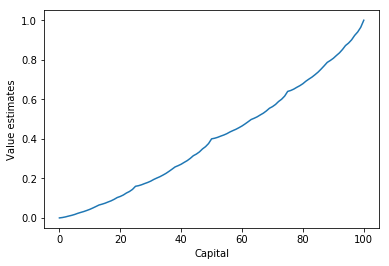

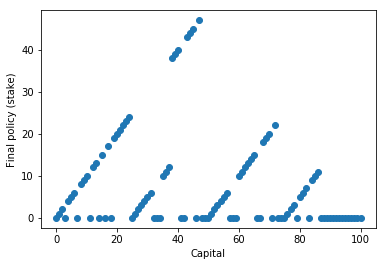

In [4]:
# probability of head
headProb = 0.4

# optimal policy
policy = np.zeros(GOAL + 1)

# state value
stateValue = np.zeros(GOAL + 1)
stateValue[GOAL] = 1.0

# value iteration
sweep = 0
while True:
    delta = 0.0
    for state in states[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + \
                                 (1 - headProb) * stateValue[state - action])
        newValue = np.max(actionReturns)
        delta += np.abs(stateValue[state] - newValue)
        # update state value
        stateValue[state] = newValue
    if delta < 1e-9:
        break

# calculate the optimal policy
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    actionReturns = []
    for action in actions:
        actionReturns.append(headProb * stateValue[state + action] + \
                             (1 - headProb) * stateValue[state - action])
    # due to tie, can't reproduce the optimal policy in book
    policy[state] = actions[np.argmax(actionReturns)]

# figure 4.3
plt.figure(1)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(stateValue)
plt.figure(2)
plt.scatter(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()